In [4]:
# a. Import required libraries
from ipywidgets import FileUpload
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# b. Upload / access the dataset
uploader = FileUpload(accept='.csv', multiple=False)
display(uploader)


FileUpload(value={}, accept='.csv', description='Upload')

In [6]:
if uploader.value:
    uploaded_file = list(uploader.value.values())[0]
    content = uploaded_file['content']
    data = pd.read_csv(io.BytesIO(content))
    print("File uploaded successfully!")
    print(data.shape)
    display(data.head())
else:
    raise ValueError("Please upload the ECG dataset (.csv)")

File uploaded successfully!
(4997, 141)


,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [9]:
# c. Encoder converts it into latent representation
X = data.astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

input_dim = X_scaled.shape[1]
encoding_dim = 8

input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='relu')(input_layer)
encoder = Dense(16, activation='relu')(encoder)
latent = Dense(encoding_dim, activation='relu')(encoder)

In [10]:
# d. Decoder networks convert it back to the original input
decoder = Dense(16, activation='relu')(latent)
decoder = Dense(32, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='linear')(decoder)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.8386 - mae: 0.6635 - val_loss: 0.6014 - val_mae: 0.5381
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4544 - mae: 0.4452 - val_loss: 0.3523 - val_mae: 0.4202
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3424 - mae: 0.3793 - val_loss: 0.3102 - val_mae: 0.3896
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2967 - mae: 0.3433 - val_loss: 0.2759 - val_mae: 0.3653
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2647 - mae: 0.3208 - val_loss: 0.2637 - val_mae: 0.3553
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2388 - mae: 0.3048 - val_loss: 0.2444 - val_mae: 0.3382
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2138 - mae: 0.2921 - val_loss: 0.2392 - val_mae: 0.3356
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1980 - mae: 0.2819 - val_loss: 0.2298 - val_mae: 0.3257
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

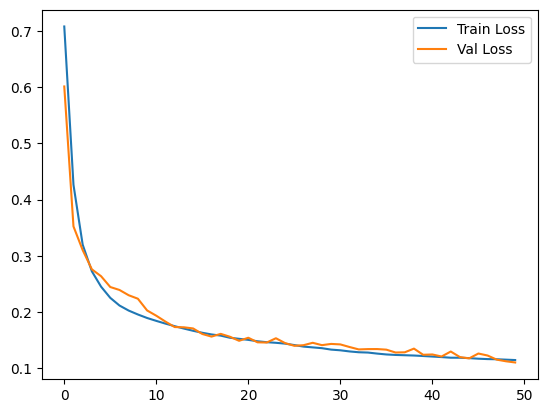

In [11]:
# e. Compile the model with Optimizer, Loss, and Evaluation Metrics
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2, shuffle=True)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()